# Tutorial 1: Introduction to lossless image compression algorithms
0. Recap on working with image data
1. Run Length Encoding

In [123]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os
import io
from PIL import Image

In [124]:
%matplotlib inline

In [125]:
'''
Image utilities.
'''
def show(img, figsize=(6, 6)):
    '''
    Display image.
    '''
    figure=plt.figure(figsize=figsize)
    
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()
    
def showgrid(img, binflag=0, figsize=(6, 6)):
    '''
    Display pixel values of image.
    '''
    fig, ax = plt.subplots(figsize=figsize)

    min_val, max_val = 0, 6
    ax.matshow(img, cmap='gray', vmin=0, vmax=1)

    for i in range(6):
        for j in range(6):
            c = img[j,i] # get pixel value
            if binflag: # convery integer to bit string
                bits = np.unpackbits(np.array([c], np.uint8))
                bitstring = ''.join(str(i) for i in bits)
                ax.text(i, j, bitstring, va='center', ha='center', fontsize=10)
            else:
                ax.text(i, j, str(c), va='center', ha='center', fontsize=20)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()
    
def printbytestring(img):
    unpacked = np.unpackbits(img.flatten())
    return ''.join('{} '.format(byt) for byt in [''.join(str(el) for el in list(unpacked[i:i+8])) for i in range(0,len(unpacked),8)])

In [126]:
# Adapted from:
# - https://q-viper.github.io/2021/05/24/coding-run-length-encoding-in-python/

def RLE_encoding(img, bits=8):
    """
    img: Grayscale img.
    bits: what will be the maximum run length? 2^bits       
    """
    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    for pixel in fimg:
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))
    
    return np.array(encoded, np.uint8)

## 0. Image data recap

In [135]:
# custom image as array
dummy = np.array([
    [1,1,1,1,1,1],
    [50,50,50,50,50,50],
    [100,100,100,100,100,100],
    [150,150,150,150,150,150],
    [200,200,200,200,200,200],
    [255,255,255,255,255,255]
]).astype(np.uint8)
# dummy = dummy.transpose()

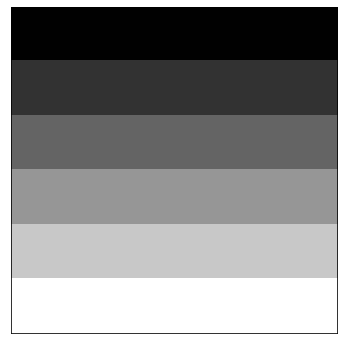

In [136]:
# dummy = np.random.randint(0, 255, (6, 6)).astype(np.uint8)
# dummy = 255*np.ones([6, 6]).astype(np.uint8)
show(dummy)

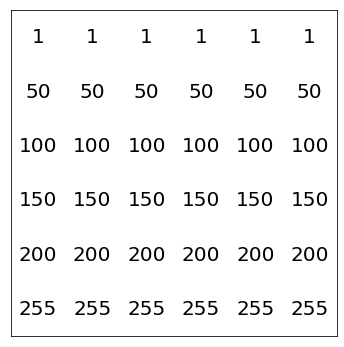

In [137]:
showgrid(dummy, binflag=False)

In [138]:
printbytestring(dummy)

'00000001 00000001 00000001 00000001 00000001 00000001 00110010 00110010 00110010 00110010 00110010 00110010 01100100 01100100 01100100 01100100 01100100 01100100 10010110 10010110 10010110 10010110 10010110 10010110 11001000 11001000 11001000 11001000 11001000 11001000 11111111 11111111 11111111 11111111 11111111 11111111 '

# 1. Run-Length Encoding

In [139]:
encoded = RLE_encoding(dummy, bits=8)
encoded

array([[  6,   1],
       [  6,  50],
       [  6, 100],
       [  6, 150],
       [  6, 200],
       [  6, 255]], dtype=uint8)

In [140]:
printbytestring(encoded)

'00000110 00000001 00000110 00110010 00000110 01100100 00000110 10010110 00000110 11001000 00000110 11111111 '

In [141]:
# number of bytes in the RLE encoded version
encoded.nbytes

12

In [142]:
# number of bits in the RLE encoded version
encoded.nbytes*8

96